# Importações

In [44]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
import os
import requests
import pandas as pd
import sqlite3

# Download dos dados

In [ ]:
# URL base para os datasets
base_url = 'https://storage.googleapis.com/covid19-open-data/v3/'

# Lista de arquivos CSV
file_list = [
    "vaccinations.csv",
    "index.csv",
    "epidemiology.csv",
    "demographics.csv",
    "economy.csv",
    "health.csv",
    "geography.csv",
    "mobility.csv",
    "weather.csv",
    "hospitalizations.csv"
]

# Diretório destino
base_dir = "Data"

try:
    # Verifica se o diretório existe, caso contrário, cria o diretório.
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
        print(f"Diretório {base_dir} criado.")
    else:
        print(f"Diretório {base_dir} já existe.")

    # Faz o download dos arquivos
    for file in file_list:
        file_path_url = base_url + file
        file_path_download = os.path.join(base_dir, file)

        # Verifica se o arquivo já existe
        if os.path.exists(file_path_download):
            file_size = os.path.getsize(file_path_download)
            print(f"Arquivo {file} já existe. Tamanho: {file_size} bytes.")
        else:
            print(f"Baixando {file}...")
            response = requests.get(file_path_url)
            response.raise_for_status()  # Verifica se houve erro no download

            # Salva o arquivo no diretório especificado
            with open(file_path_download, 'wb') as f:
                f.write(response.content)
            print(f"Arquivo {file} salvo em: {file_path_download}")

except requests.exceptions.HTTPError as errh:
    print(f"Erro HTTP: {errh}")
except requests.exceptions.ConnectionError as errc:
    print(f"Erro de Conexão: {errc}")
except requests.exceptions.Timeout as errt:
    print(f"Timeout: {errt}")
except requests.exceptions.RequestException as err:
    print(f"Erro ao fazer o download: {err}")
except Exception as e:
    print(f"Erro inesperado: {e}")

Diretório Data já existe.
Arquivo vaccinations.csv já existe. Tamanho: 164305510 bytes.
Arquivo index.csv já existe. Tamanho: 2426323 bytes.
Arquivo epidemiology.csv já existe. Tamanho: 520931512 bytes.
Arquivo demographics.csv já existe. Tamanho: 1544607 bytes.
Arquivo economy.csv já existe. Tamanho: 10228 bytes.
Arquivo health.csv já existe. Tamanho: 122072 bytes.
Arquivo geography.csv já existe. Tamanho: 1005065 bytes.
Arquivo mobility.csv já existe. Tamanho: 234579795 bytes.
Arquivo weather.csv já existe. Tamanho: 1686450111 bytes.
Arquivo hospitalizations.csv já existe. Tamanho: 66428667 bytes.


# Exploração dos Dados

In [47]:
# Ler os arquivos CSV
index_df = pd.read_csv(os.path.join(base_dir, 'index.csv'))
vaccinations_df = pd.read_csv(os.path.join(base_dir, 'vaccinations.csv'))
epidemiology_df = pd.read_csv(os.path.join(base_dir, 'epidemiology.csv'))
demographics_df = pd.read_csv(os.path.join(base_dir, 'demographics.csv'))
economy_df = pd.read_csv(os.path.join(base_dir, 'economy.csv'))
health_df = pd.read_csv(os.path.join(base_dir, 'health.csv'))
geography_df = pd.read_csv(os.path.join(base_dir, 'geography.csv'))
mobility_df = pd.read_csv(os.path.join(base_dir, 'mobility.csv'))
weather_df = pd.read_csv(os.path.join(base_dir, 'weather.csv'))
hospitalizations_df = pd.read_csv(os.path.join(base_dir, 'hospitalizations.csv'))

## epidemiology_df

In [48]:
epidemiology_df.head(10)

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
5,2020-01-06,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
6,2020-01-07,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
7,2020-01-08,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
8,2020-01-09,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
9,2020-01-10,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [49]:
epidemiology_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525825 entries, 0 to 12525824
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  object 
 1   location_key          object 
 2   new_confirmed         float64
 3   new_deceased          float64
 4   new_recovered         float64
 5   new_tested            float64
 6   cumulative_confirmed  float64
 7   cumulative_deceased   float64
 8   cumulative_recovered  float64
 9   cumulative_tested     float64
dtypes: float64(8), object(2)
memory usage: 955.6+ MB


### Ajustes de tipo de dados

In [ ]:
epidemiology_df['location_key'] = epidemiology_df['location_key'].astype(str) # Converter para string
epidemiology_df['date'] = pd.to_datetime(epidemiology_df['date']) # Converter para datetime

In [95]:
epidemiology_descriptive_analysis = epidemiology_df.describe()
print(epidemiology_descriptive_analysis)

                                date  new_confirmed  new_deceased  \
count                       12525825   1.247580e+07  1.166714e+07   
mean   2021-05-27 09:09:11.003419136   1.111905e+02  1.274817e+00   
min              2019-12-31 00:00:00  -5.045418e+06 -6.381100e+04   
25%              2020-10-29 00:00:00   0.000000e+00  0.000000e+00   
50%              2021-05-22 00:00:00   1.000000e+00  0.000000e+00   
75%              2021-12-24 00:00:00   1.100000e+01  0.000000e+00   
max              2022-12-30 00:00:00   5.047094e+06  6.383000e+04   
std                              NaN   1.165983e+04  8.808127e+01   

       new_recovered    new_tested  cumulative_confirmed  cumulative_deceased  \
count   3.980462e+06  3.194489e+06          1.232704e+07         1.147482e+07   
mean    2.104549e+02  2.509508e+03          3.539969e+04         5.874310e+02   
min    -1.001683e+07 -3.541552e+08          0.000000e+00         0.000000e+00   
25%     0.000000e+00  1.000000e+00          2.020000e+

### Resultados para BR

In [102]:
# Exibir os valores em uma lista
epidemiology_df['location_keys'] = epidemiology_df['location_key'].tolist() # Converter para lista

print(epidemiology_df['location_keys'])


0           AD
1           AD
2           AD
3           AD
4           AD
            ..
12525820    ZW
12525821    ZW
12525822    ZW
12525823    ZW
12525824    ZW
Name: location_keys, Length: 12525825, dtype: object


In [100]:
# Filtrar apenas os valores que começam com "BR_"
br_location_keys_df = epidemiology_df[epidemiology_df['location_key'].apply(lambda x: len(x) == 5 and x.startswith("BR_"))]

# Exibir o resultado
print(br_location_keys_df)


              date location_key  new_confirmed  new_deceased  new_recovered  \
574646  2020-01-01        BR_AC            1.0           NaN            0.0   
574647  2020-01-02        BR_AC            4.0           NaN            0.0   
574648  2020-01-03        BR_AC            1.0           NaN            0.0   
574649  2020-01-04        BR_AC            7.0           NaN            0.0   
574650  2020-01-05        BR_AC            1.0           NaN            0.0   
...            ...          ...            ...           ...            ...   
5540250 2022-09-11        BR_TO            0.0           0.0            NaN   
5540251 2022-09-12        BR_TO          117.0           1.0            NaN   
5540252 2022-09-13        BR_TO           25.0           0.0            NaN   
5540253 2022-09-14        BR_TO           42.0           3.0            NaN   
5540254 2022-09-15        BR_TO           40.0           1.0            NaN   

         new_tested  cumulative_confirmed  cumulati

In [103]:
br_location_keys_df['location_key'].unique()

array(['BR_AC', 'BR_AL', 'BR_AM', 'BR_AP', 'BR_BA', 'BR_CE', 'BR_DF',
       'BR_ES', 'BR_GO', 'BR_MA', 'BR_MG', 'BR_MS', 'BR_MT', 'BR_PA',
       'BR_PB', 'BR_PE', 'BR_PI', 'BR_PR', 'BR_RJ', 'BR_RN', 'BR_RO',
       'BR_RR', 'BR_RS', 'BR_SC', 'BR_SE', 'BR_SP', 'BR_TO'], dtype=object)

In [104]:
epidemiology_df[epidemiology_df['location_key'].isin(br_location_keys_df)]

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,location_keys


### Resultados para Rio de Janeiro

In [105]:
epidemiology_df[epidemiology_df['location_key']  == 'BR_RJ'].head(10)

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,location_keys
3854617,2020-01-01,BR_RJ,10.0,NaN,0.0,40.0,10.0,NaN,0.0,40.0,BR_RJ
3854618,2020-01-02,BR_RJ,46.0,NaN,0.0,118.0,56.0,NaN,0.0,158.0,BR_RJ
3854619,2020-01-03,BR_RJ,19.0,NaN,0.0,53.0,75.0,NaN,0.0,211.0,BR_RJ
3854620,2020-01-04,BR_RJ,129.0,NaN,0.0,346.0,204.0,NaN,0.0,557.0,BR_RJ
3854621,2020-01-05,BR_RJ,74.0,NaN,0.0,258.0,278.0,NaN,0.0,815.0,BR_RJ
3854622,2020-01-06,BR_RJ,66.0,NaN,0.0,191.0,344.0,NaN,0.0,1006.0,BR_RJ
3854623,2020-01-07,BR_RJ,36.0,NaN,0.0,116.0,380.0,NaN,0.0,1122.0,BR_RJ
3854624,2020-01-08,BR_RJ,36.0,NaN,0.0,89.0,416.0,NaN,0.0,1211.0,BR_RJ
3854625,2020-01-09,BR_RJ,11.0,NaN,0.0,33.0,427.0,NaN,0.0,1244.0,BR_RJ
3854626,2020-01-10,BR_RJ,6.0,NaN,0.0,22.0,433.0,NaN,0.0,1266.0,BR_RJ


### Séries Temporais

In [70]:
import matplotlib.pyplot as plt

In [76]:
# Filtrar dados para uma localização específica (ex: BR_RJ)
br_rj_df = epidemiology_df[epidemiology_df['location_key'] == 'BR_RJ'].drop(columns=['location_key']).dropna()

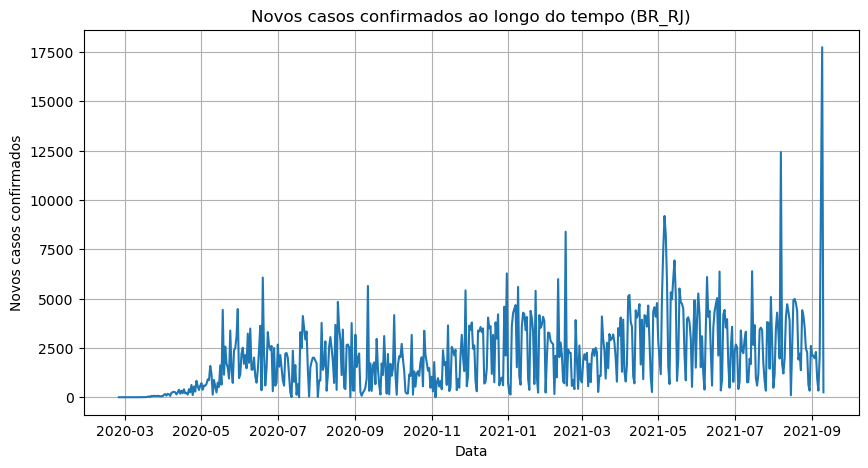

In [107]:
# Plotar novos casos confirmados ao longo do tempo
plt.figure(figsize=(10, 5))
plt.plot(br_rj_df['date'], br_rj_df['new_confirmed'])
plt.title('Novos casos confirmados ao longo do tempo (BR_RJ)')
plt.xlabel('Data')
plt.ylabel('Novos casos confirmados')
plt.grid()
plt.show()

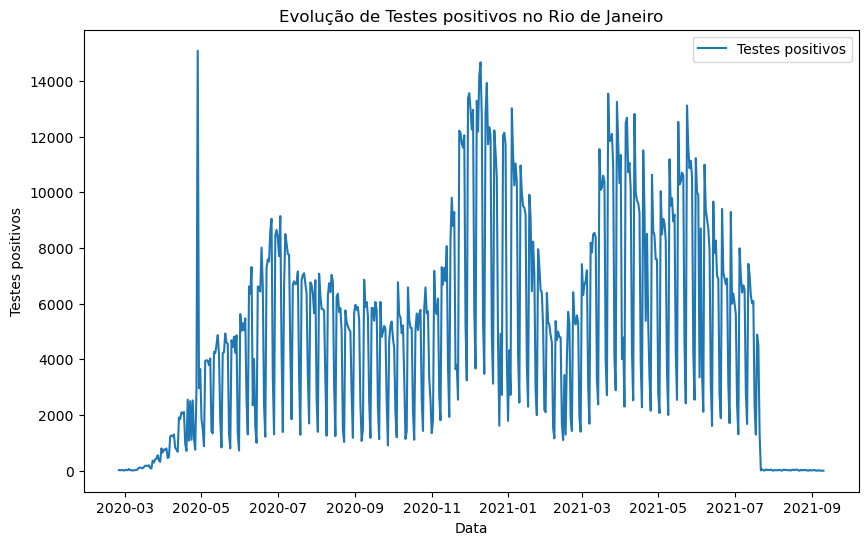

In [ ]:
# Plotar casos recuperados ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(br_rj_df['date'], br_rj_df['new_tested'], label='Testes positivos')
plt.xlabel('Data')
plt.ylabel('Testes positivos')
plt.title('Evolução de Testes positivos no Rio de Janeiro')
plt.legend()
plt.show()

### Correlação

In [ ]:
correlative = br_rj_df.corr()
print(correlative)

                          date  new_confirmed  new_deceased  new_recovered  \
date                  1.000000       0.456040      0.342910            NaN   
new_confirmed         0.456040       1.000000      0.618843            NaN   
new_deceased          0.342910       0.618843      1.000000            NaN   
new_recovered              NaN            NaN           NaN            NaN   
new_tested            0.166244       0.273032      0.348998            NaN   
cumulative_confirmed  0.985126       0.434518      0.314138            NaN   
cumulative_deceased   0.987527       0.443300      0.326173            NaN   
cumulative_recovered       NaN            NaN           NaN            NaN   
cumulative_tested     0.992933       0.448387      0.341096            NaN   

                      new_tested  cumulative_confirmed  cumulative_deceased  \
date                    0.166244              0.985126             0.987527   
new_confirmed           0.273032              0.434518       